# Guiding questions

In which fields does the international student population overtake the domestic student population?

How important a role do international students play in our graduate programs?

Are students making compromises in academic choices in order to receive better chances of getting work visa?

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils import read_gss
d, ufields = read_gss('../data/GSS_Columbia_Detailed.csv')

In [3]:
DOM_COL_NAME = 'U.S. citizens and permanent residents (non-U.S. citizens holding green cards)'
INT_COL_NAME = 'Foreign nationals'

DOM_LABEL = 'U.S. citizens & permanent residents'
INT_LABEL = INT_COL_NAME

In [10]:
years = np.arange(1994, 2017)

def plotField(ax, field):
    international = [d[year][field].get(INT_COL_NAME, None) for year in years]
    ax.plot(years, international, label=INT_LABEL)
    
    ax.set_title(field)
    ax.set(xlabel='Year', ylabel='Number of graduate students')

IndexError: index 16 is out of bounds for axis 0 with size 16

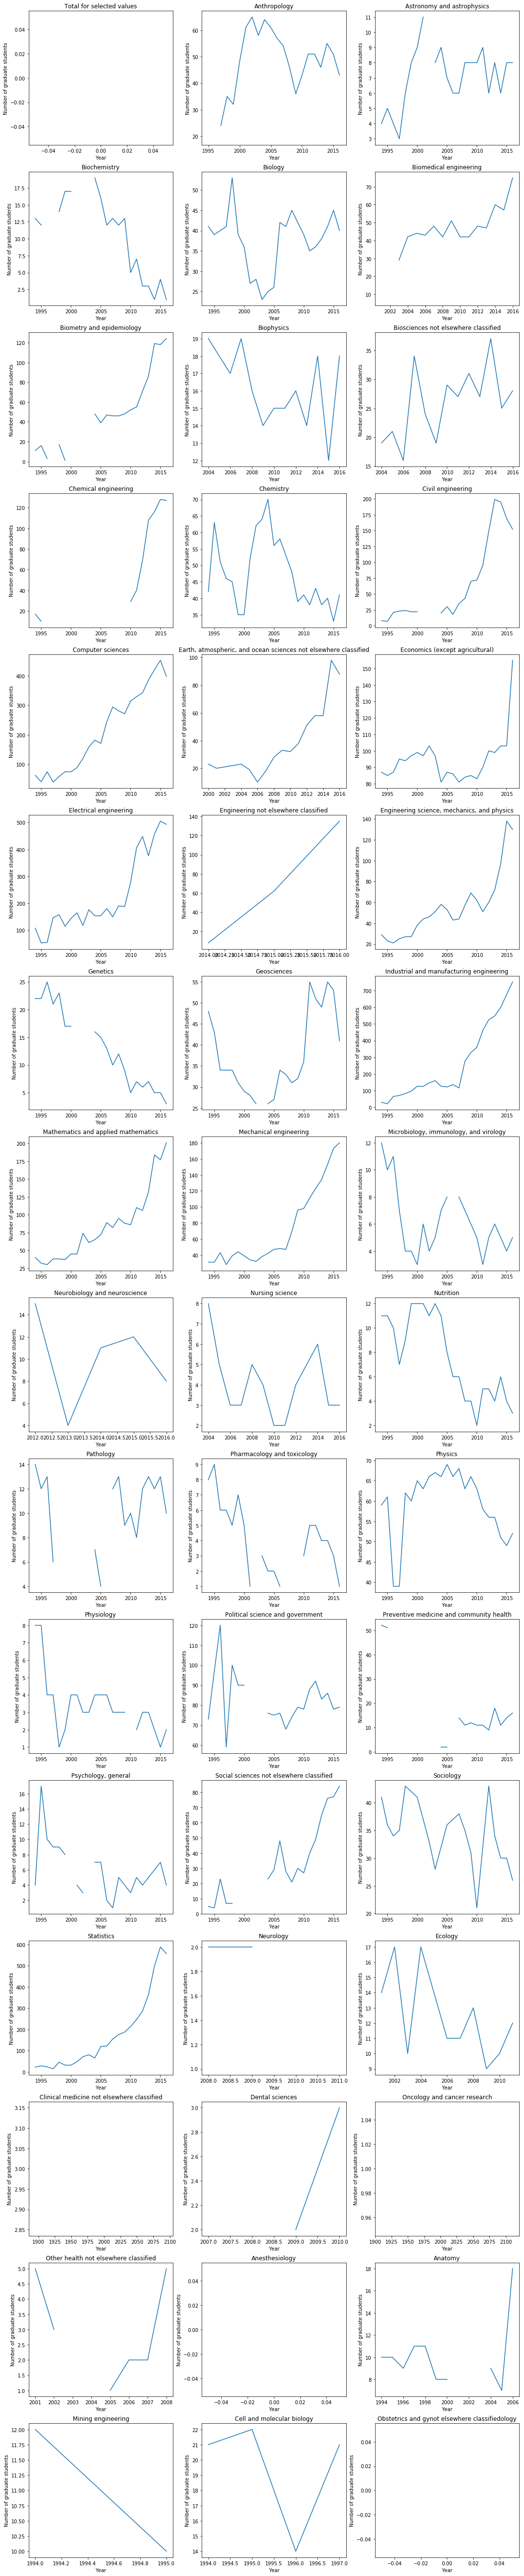

In [11]:
cols = 3
rows = int(len(ufields) / cols)

_, axarr = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))

for i in range(len(ufields)):
    plotField(axarr[ i // cols, i % cols ], ufields[i])

Let's isolate those STEM fields that see the greatest international student increases.

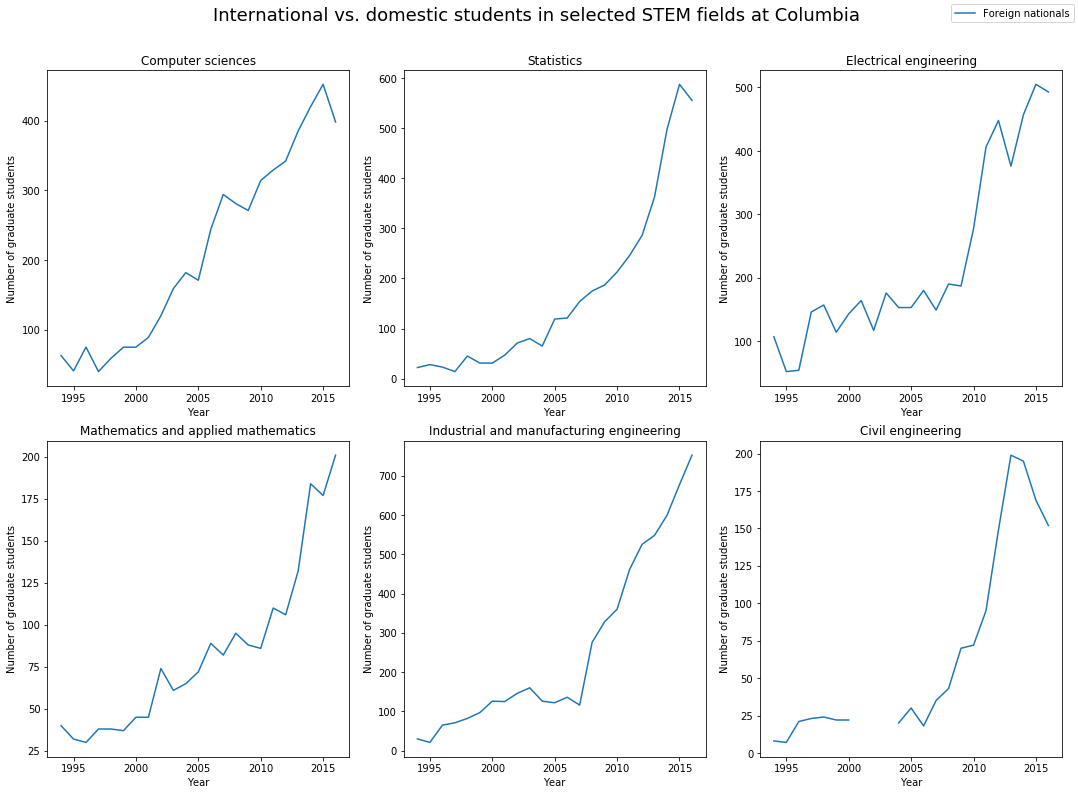

In [12]:
fieldsOfInterest = [
    'Computer sciences',
    'Statistics',
    'Electrical engineering',
    'Mathematics and applied mathematics',
    'Industrial and manufacturing engineering',
    'Civil engineering',
]

fig, axarr = plt.subplots(2, 3, figsize=(15, 11))

for i in range(len(fieldsOfInterest)):
    plotField(axarr[i // 3, i % 3], fieldsOfInterest[i])

handles, labels = axarr[-1, -1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

fig.tight_layout()
st = fig.suptitle("International vs. domestic students in selected STEM fields at Columbia", fontsize=18)
st.set_y(1)
fig.subplots_adjust(top=.92)
# fig.savefig('selected_detailed_fields.png')

But we cannot solely show these charts. We must compare these values with some baseline.

We need a chart that tells this story
* International students are opting for STEM departments over non-STEM departments
* This is a pattern that has only emerged in the last decade or so

Compare growth rates at most popular STEM vs. non-STEM departments?

**We don't need to visualize domestic students.**

## Findings